# 차분(Differencing) 과 이동평균(MA) - Simple Trade Strategy

In [1]:
# !pip install pandas_datareader
#!pip install yfinance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as data_reader

## Price difference (익일 종가 - 당일 종가)

PriceDiff = (Close Price of tomorrow - Close Price of today)

- shift(period)

In [2]:
fb = data_reader.DataReader("FB", data_source="yahoo")    #Facebook
ms = data_reader.DataReader("MSFT", data_source="yahoo")  #Microsoft

In [3]:
fb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-06,365.149994,361.399994,361.399994,363.510010,8925000,363.510010
2021-08-09,365.779999,360.750000,363.760010,361.609985,7798900,361.609985
2021-08-10,364.100006,359.040009,361.829987,361.130005,7469900,361.130005
2021-08-11,362.359985,357.809998,362.100006,359.959991,8400300,359.959991
2021-08-12,363.000000,357.109985,358.450012,362.649994,7170700,362.649994


In [4]:
fb.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)
ms.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [5]:
fb['Yesterday Close'] = fb['Close'].shift(1)
fb.head()

,Close,Yesterday Close
Date,,
2021-08-06,363.510010,NaN
2021-08-09,361.609985,363.510010
2021-08-10,361.130005,361.609985
2021-08-11,359.959991,361.130005
2021-08-12,362.649994,359.959991


Price Difference - manual 계산

In [6]:
fb['Price Difference'] = fb['Close'] - fb['Yesterday Close']
fb.head()

,Close,Yesterday Close,Price Difference
Date,,,
2021-08-06,363.510010,NaN,NaN
2021-08-09,361.609985,363.510010,-1.900024
2021-08-10,361.130005,361.609985,-0.479980
2021-08-11,359.959991,361.130005,-1.170013
2021-08-12,362.649994,359.959991,2.690002


Price Difference - diff() method 사용

In [7]:
fb['Price Diff2'] = fb['Close'].diff()
fb.head()

,Close,Yesterday Close,Price Difference,Price Diff2
Date,,,,
2021-08-06,363.510010,NaN,NaN,NaN
2021-08-09,361.609985,363.510010,-1.900024,-1.900024
2021-08-10,361.130005,361.609985,-0.479980,-0.479980
2021-08-11,359.959991,361.130005,-1.170013,-1.170013
2021-08-12,362.649994,359.959991,2.690002,2.690002


In [8]:
ms['Yesterday Close'] = ms['Close'].shift(1)
ms['Price Difference'] = ms['Close'].diff()
ms.head()

,Close,Yesterday Close,Price Difference
Date,,,
2017-08-07,72.400002,NaN,NaN
2017-08-08,72.790001,72.400002,0.389999
2017-08-09,72.470001,72.790001,-0.320000
2017-08-10,71.410004,72.470001,-1.059998
2017-08-11,72.500000,71.410004,1.089996


In [9]:
print(ms['Price Difference'].loc['2017-11-03'])

0.089996337890625


In [10]:
ms.head()

,Close,Yesterday Close,Price Difference
Date,,,
2017-08-07,72.400002,NaN,NaN
2017-08-08,72.790001,72.400002,0.389999
2017-08-09,72.470001,72.790001,-0.320000
2017-08-10,71.410004,72.470001,-1.059998
2017-08-11,72.500000,71.410004,1.089996


차분한 값으로부터 원래의 값 복원하기

In [11]:
ms['Price Difference'].cumsum() + ms['Close'][0]

Date
2017-08-07           NaN
2017-08-08     72.790001
2017-08-09     72.470001
2017-08-10     71.410004
2017-08-11     72.500000
                 ...    
2022-08-01    278.010010
2022-08-02    274.820007
2022-08-03    282.470001
2022-08-04    283.649994
2022-08-05    282.910004
Name: Price Difference, Length: 1259, dtype: float64

## 일일 수익률 계산

- 1 주를 계속 보유하였다고 가정.  


- 계산 방법. 

- Daily Return = df/df.shift(1) - 1  
    or
- Daily Return[1:] = df[1:] / df[:-1].values - 1  
    or    
- Daily Return = df.pct_chage()

In [12]:
ms['Return'] = ms['Close'] / ms['Yesterday Close'] - 1
ms.head()

,Close,Yesterday Close,Price Difference,Return
Date,,,,
2017-08-07,72.400002,NaN,NaN,NaN
2017-08-08,72.790001,72.400002,0.389999,0.005387
2017-08-09,72.470001,72.790001,-0.320000,-0.004396
2017-08-10,71.410004,72.470001,-1.059998,-0.014627
2017-08-11,72.500000,71.410004,1.089996,0.015264


In [13]:
ms.tail()

,Close,Yesterday Close,Price Difference,Return
Date,,,,
2022-08-01,278.010010,280.739990,-2.729980,-0.009724
2022-08-02,274.820007,278.010010,-3.190002,-0.011474
2022-08-03,282.470001,274.820007,7.649994,0.027836
2022-08-04,283.649994,282.470001,1.179993,0.004177
2022-08-05,282.910004,283.649994,-0.739990,-0.002609


In [14]:
ms['Close'][1:] / ms['Close'][:-1].values - 1

Date
2017-08-08    0.005387
2017-08-09   -0.004396
2017-08-10   -0.014627
2017-08-11    0.015264
2017-08-14    0.015034
                ...   
2022-08-01   -0.009724
2022-08-02   -0.011474
2022-08-03    0.027836
2022-08-04    0.004177
2022-08-05   -0.002609
Name: Close, Length: 1258, dtype: float64

In [15]:
ms['Close'].pct_change()

Date
2017-08-07         NaN
2017-08-08    0.005387
2017-08-09   -0.004396
2017-08-10   -0.014627
2017-08-11    0.015264
                ...   
2022-08-01   -0.009724
2022-08-02   -0.011474
2022-08-03    0.027836
2022-08-04    0.004177
2022-08-05   -0.002609
Name: Close, Length: 1259, dtype: float64

In [16]:
print(f"{len(pd.date_range(ms.index[0], ms.index[-1]))} 일간 1 주를 계속 보유하였다면 누적 수익율은")
print((1+ms['Return']).cumprod())

1825 일간 1 주를 계속 보유하였다면 누적 수익율은
Date
2017-08-07         NaN
2017-08-08    1.005387
2017-08-09    1.000967
2017-08-10    0.986326
2017-08-11    1.001381
                ...   
2022-08-01    3.839917
2022-08-02    3.795856
2022-08-03    3.901519
2022-08-04    3.917818
2022-08-05    3.907597
Name: Return, Length: 1259, dtype: float64


## 이동평균 - Moving average

- DataFrame.rolling()

In [17]:
# 3일 이동평균
(fb['Close'] + fb['Close'].shift(1) + fb['Close'].shift(2)) / 3

Date
2021-08-06           NaN
2021-08-09           NaN
2021-08-10    362.083333
2021-08-11    360.899994
2021-08-12    361.246663
                 ...    
2022-08-01    159.916667
2022-08-02    159.740000
2022-08-03    162.973333
2022-08-04    166.520004
2022-08-05    168.826670
Name: Close, Length: 252, dtype: float64

In [18]:
fb['Close'].rolling(3).mean()

Date
2021-08-06           NaN
2021-08-09           NaN
2021-08-10    362.083333
2021-08-11    360.899994
2021-08-12    361.246663
                 ...    
2022-08-01    159.916667
2022-08-02    159.740000
2022-08-03    162.973333
2022-08-04    166.520004
2022-08-05    168.826670
Name: Close, Length: 252, dtype: float64

### 이동평균 계산 및 이동평균선 시각화

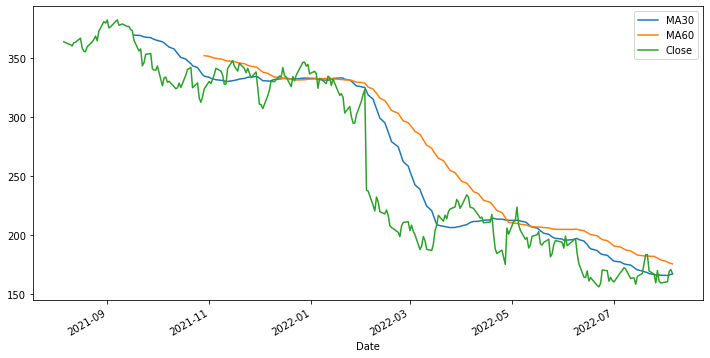

In [19]:
fb['ma30'] = fb['Close'].rolling(30).mean()
fb['ma60'] = fb['Close'].rolling(60).mean()#plot the moving average

#plot the moving average
plt.figure(figsize=(12, 6))
fb['ma30'].plot(label='MA30')
fb['ma60'].plot(label='MA60')
fb['Close'].plot(label='Close')
plt.legend()

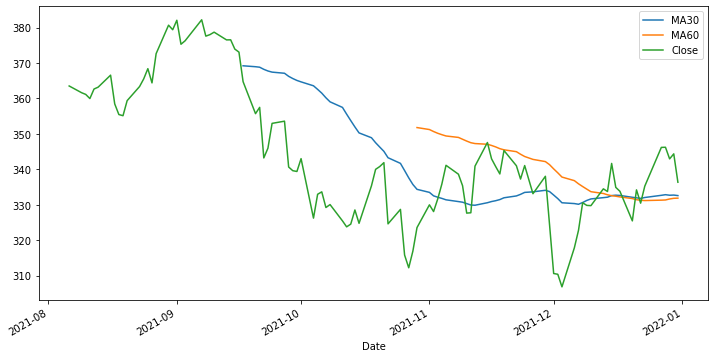

In [20]:
#특정 기간을 slicing한 이동평균 plot
plt.figure(figsize=(12, 6))
fb['ma30'].loc['2021-01-01':'2021-12-31'].plot(label='MA30')
fb['ma60'].loc['2021-01-01':'2021-12-31'].plot(label='MA60')
fb['Close'].loc['2021-01-01':'2021-12-31'].plot(label='Close')
plt.legend()
plt.show()

## EWMA (Exponentially-weighted moving average)


SMA(Simple Moving Average)에는 몇 가지 "약점"이 있습니다.
* window 가 작을수록 신호가 아닌 잡음이 증가합니다.
* 항상 window 크기만큼 지연됩니다.
* 평균화로 인해 데이터의 전체 피크 또는 계곡에 도달하지 않습니다.
* 미래의 움직임에 대해 실제로 알려주지 않습니다. 실제로는 데이터의 trend를 묘사하는 것입니다.
* 극단적인 historical value 로 인해 SMA가 크게 왜곡 될 수 있습니다.

이러한 문제를 해결하기 위해 EWMA (지수 가중 이동 평균)를 사용할 수 있습니다.

In [21]:
df = yf.download('AAPL', start='2020-01-01', end='2020-06-30', progress=False)
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
df.head()

,Close
Date,
2019-12-31,73.412498
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504


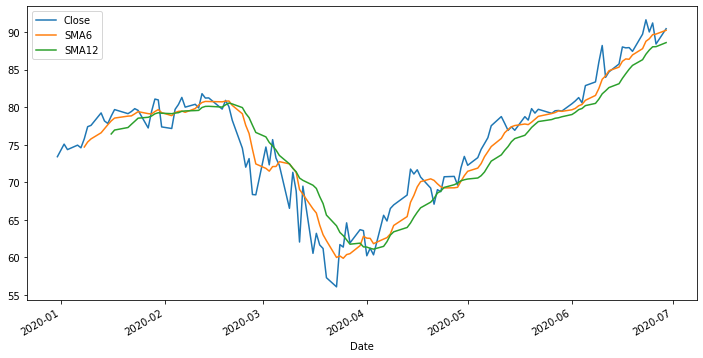

In [22]:
#SMA : Simple Moving Average

df['SMA6'] = df['Close'].rolling(window=6).mean()
df['SMA12'] = df['Close'].rolling(window=12).mean()
df.plot(figsize=(12, 6));

- EWMA를 사용하면 SMA의 지연 효과를 줄일 수 있으며 최근에 발생한 값에 더 많은 가중치를 적용합니다.  

- 가장 최근 값에 적용되는 가중치는 EWMA에 사용된 실제 매개 변수와 window 크기로 지정된 기간에 따라 다릅니다.

EWMA 공식은 다음과 같습니다.

$$ y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$$

$x_t$ 는 입력값, $w_i$ 는 적용된 weight (i=0 에서 t 사이로 변할 수 있음). $y_t$ 는 산출된 값입니다.

In [26]:
df['EWMA12'] = df['Close'].ewm(span=12).mean()
df.tail()

,Close,SMA6,SMA12,EWMA12
Date,,,,
2020-06-23,91.632500,88.771666,87.052082,87.036708
2020-06-24,90.014999,89.104167,87.606249,87.494907
2020-06-25,91.209999,89.656250,88.040624,88.066459
2020-06-26,88.407501,89.735416,88.057082,88.118927
2020-06-29,90.445000,90.237916,88.596249,88.476785


<AxesSubplot:xlabel='Date'>

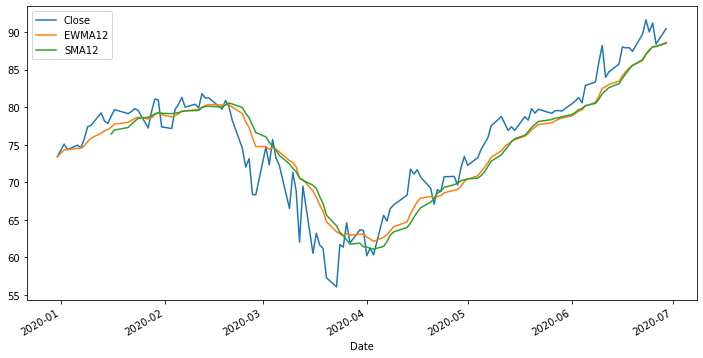

In [27]:
df[['Close', 'EWMA12', 'SMA12']].plot(figsize=(12, 6))